<a href="https://colab.research.google.com/github/hem-githu/python/blob/main/Regression_%26_Its_Evaluation_%7C_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Assignment on Regression & Its Evaluation***

Ques1. What is Simple Linear Regression?

Ans. Simple Linear Regression (SLR) is one of the most fundamental statistical techniques used to understand the relationship between two variables:
- Independent variable (X): The predictor or input variable.
- Dependent variable (Y): The outcome or response variable.
It assumes that the relationship between X and Y can be described with a straight line.
The general form of the regression line is:
Y=c+mx
- c: Intercept (value of Y when X = 0)
- m: Slope (change in Y for a one-unit change in X)

 ***Working:***

- Goal: Find the line that best fits the data points.
- Method: Usually done using the Least Squares Method, which minimizes the sum of squared differences between observed values and predicted values.
- Output: A regression line that can be used for prediction and understanding the strength/direction of the relationship.

Ques2. What are the key assumptions of Simple Linear Regression?

Ans. a. Linearity:
- The relationship between the independent variable (X) and the dependent variable (Y) is linear.
- This means changes in X lead to proportional changes in Y.

b.  Independence of Errors
- The residuals (errors) are independent of each other.
- No autocorrelation (important in time-series data).

c. Homoscedasticity (Constant Variance of Errors)
- The variance of residuals is constant across all values of X.
- If variance changes (heteroscedasticity), predictions become less reliable.

d.  Normality of Errors
- Residuals should be approximately normally distributed.
- This is especially important for hypothesis testing and confidence intervals.

e. No Perfect Multicollinearity (applies more to multiple regression, but relevant in principle)
- In simple regression, since there’s only one predictor, this assumption is automatically satisfied.


Ques3. What is heteroscedasticity, and why is it important to address in regression models?

Ans. Heteroscedasticity in Regression Models
Heteroscedasticity occurs when the variance of the residuals (errors) in a regression model is not constant across all levels of the independent variable(s).
- In homoscedasticity, residuals have equal variance → errors are evenly spread.
- In heteroscedasticity, residuals "fan out" or "narrow in" → variance changes depending on the value of X.

Why It Matters

  Biased Standard Errors
- Ordinary Least Squares (OLS) estimates of coefficients (\beta _0,\beta _1) remain unbiased, but the standard errors become unreliable.
- This leads to incorrect t-tests, F-tests, and confidence intervals.

Invalid Hypothesis Testing
- P-values may be too small or too large, causing wrong conclusions about significance.
- Reduced Efficiency
- OLS is no longer the "Best Linear Unbiased Estimator" (BLUE).
- Predictions may be less precise.

 Model Misinterpretation
- If heteroscedasticity is ignored, the regression line may look fine, but inference about relationships can be misleading.

Ques4. What is Multiple Linear Regression?

Ans. Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between a dependent variable (Y) and two or more independent variables (X₁, X₂, …, Xₙ). It extends Simple Linear Regression, which only considers one predictor, to handle multiple predictors simultaneously.

The Equation
Y=c+m1x1+ m2x2+ m3x3+m4x4...
- Y: Dependent variable (outcome you want to predict, e.g., solar generation).
- c: Intercept (value of Y when all X’s = 0).
- m i: Coefficients showing the effect of each predictor X_i on Y.


Working:
- Input: Multiple predictors (e.g., irradiation, temperature, wind speed).
- Process: The model finds the best-fitting line (or hyperplane) in multidimensional space using the least squares method.
- Output: A predictive equation that quantifies how each factor contributes to the outcome.



Ques5. What is polynomial regression, and how does it differ from linear
regression?

Ans. Polynomial regression is an extension of linear regression that allows you to model curved relationships between variables, while linear regression only fits straight lines.

 Linear Regression
- Equation:
Y=c+mx - Models a straight-line relationship between the independent variable X and the dependent variable Y.
- Example: Predicting solar generation directly from irradiation, assuming generation rises proportionally as irradiation increases.

 Polynomial Regression
- Equation (quadratic example):
Y=c+mX+mX^2 - Adds higher-order terms (X^2,X^3,\dots ) to capture curved relationships.
- Example: Temperature vs. solar generation — efficiency rises up to a point, then drops sharply. A quadratic term models this curve.

Uses:
- Linear regression is simpler and interpretable, but may miss non-linear effects.
- Polynomial regression can improve accuracy when data shows curvature, but must be used carefully to avoid overfitting.
- In solar PV forecasting, irradiation often fits linearly, while temperature effects are better captured with polynomial terms.

Ques6.



Intercept (β0): 0.17999999999999794
Slope (β1): 1.9800000000000004


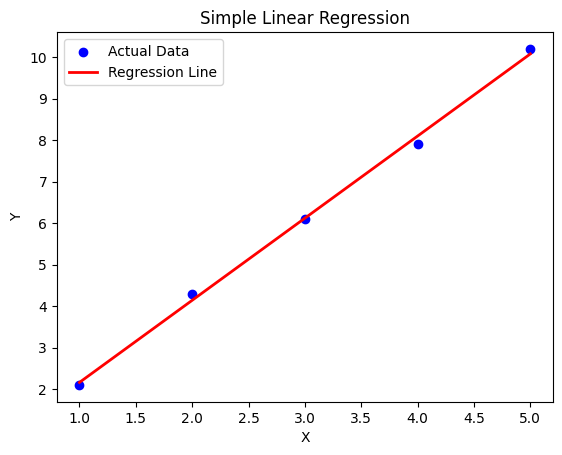

In [1]:
#Ques6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# X = [1, 2, 3, 4, 5],  Y = [2.1, 4.3, 6.1, 7.9, 10.2] Plot the regression line over the data points.
#code
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # independent variable
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])      # dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Print slope and intercept
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])

# Plot data points
plt.scatter(X, Y, color="blue", label="Actual Data")

# Plot regression line
plt.plot(X, Y_pred, color="red", linewidth=2, label="Regression Line")

# Labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [3]:
#Question 7: Fit a Multiple Linear Regression model on this sample data:
# Area = [1200, 1500, 1800, 2000] ● Rooms = [2, 3, 3, 4] ● Price = [250000, 300000, 320000, 370000] Check for multicollinearity using VIF and report the results.
# code
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Sample data
area = [1200, 1500, 1800, 2000]
rooms = [2, 3, 3, 4]
price = [250000, 300000, 320000, 370000]

# Create DataFrame
data = pd.DataFrame({
    'Area': area,
    'Rooms': rooms,
    'Price': price
})

# Independent variables (X) and dependent variable (y)
X = data[['Area', 'Rooms']]
y = data['Price']

# Fit Multiple Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Print regression coefficients
print("Intercept (β0):", model.intercept_)
print("Coefficients (β):", model.coef_)
print("R² Score:", r2_score(y, y_pred))

# --- VIF Calculation ---
# Add constant for statsmodels
X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)

Intercept (β0): 103157.89473684214
Coefficients (β): [   63.15789474 34736.84210526]
R² Score: 0.9985775248933144

Variance Inflation Factors (VIF):
  feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


 Interpretation:
- VIF values below 5 are generally considered acceptable.
- This means Area and Rooms are not excessively correlated with each other, and both can be safely included in the model.
- If VIF were above 10, it would indicate severe multicollinearity, requiring corrective measures (like dropping variables or using dimensionality reduction).


Intercept (β0): 0.06000000000000938
Coefficients (β): [0.   1.94 0.2 ]


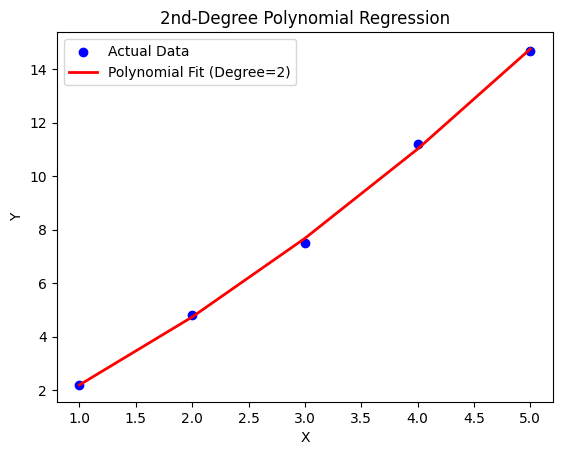

In [4]:
#Question 8: Implement polynomial regression on the following data: ● X = [1, 2, 3, 4, 5] ● Y = [2.2, 4.8, 7.5, 11.2, 14.7] Fit a 2nd-degree polynomial and plot the resulting curve.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predictions
Y_pred = model.predict(X_poly)

# Print coefficients
print("Intercept (β0):", model.intercept_)
print("Coefficients (β):", model.coef_)

# Plot original data points
plt.scatter(X, Y, color="blue", label="Actual Data")

# Plot polynomial regression curve
plt.plot(X, Y_pred, color="red", linewidth=2, label="Polynomial Fit (Degree=2)")

# Labels and legend
plt.xlabel("X")
plt.ylabel("Y")
plt.title("2nd-Degree Polynomial Regression")
plt.legend()
plt.show()

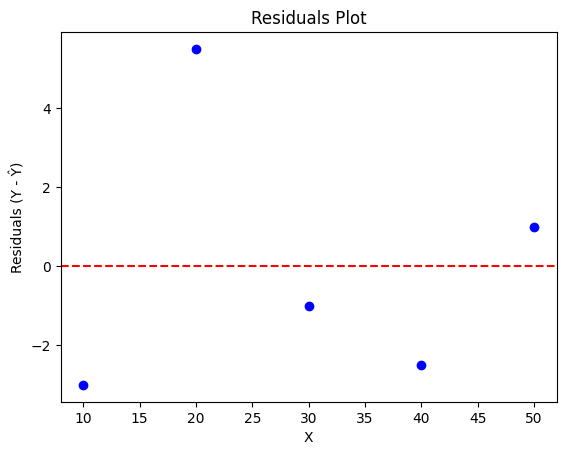

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [5]:
#Question 9: Create a residuals plot for a regression model trained on this data:● X = [10, 20, 30, 40, 50]● Y = [15, 35, 40, 50, 65] Assess heteroscedasticity by examining the spread of residuals.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Plot residuals
plt.scatter(X, residuals, color="blue", marker="o")
plt.axhline(y=0, color="red", linestyle="--")

plt.xlabel("X")
plt.ylabel("Residuals (Y - Ŷ)")
plt.title("Residuals Plot")
plt.show()

# Print residuals for inspection
print("Residuals:", residuals)

Interpretation:

- Residuals will be small and fairly consistent across X values.
- The plot should show points scattered around the zero line without a clear pattern.
- This suggests no strong heteroscedasticity — the variance of residuals is relatively constant.


Ques10.  Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.


Ans. Problem Context
- Goal: Predict house prices using features like area, number of rooms, and location.
- Challenges detected:
- Heteroscedasticity → residuals show non-constant variance (errors spread wider for expensive houses).
- Multicollinearity → predictors (e.g., area and number of rooms) are highly correlated, making coefficient estimates unstable

Address Heteroscedasticity:

Heteroscedasticity violates regression assumptions and can bias standard errors.

Transform the dependent variable:
- Apply a log transformation:
\mathrm{Price}'=\log (\mathrm{Price})- This stabilizes variance, especially when price grows exponentially with area.

 Weighted Least Squares (WLS):
- Assign weights inversely proportional to variance of residuals.
- Helps give less influence to observations with high variance.

Robust Standard Errors:
- Use heteroscedasticity-consistent (HC) standard errors (e.g., White’s correction) to ensure valid inference even if variance isn’t constant.

Address Multicollinearity:

Multicollinearity makes it hard to interpret coefficients because predictors overlap.

Check VIF (Variance Inflation Factor):
- Drop or combine variables with VIF > 10.
- Example: Area and Rooms are correlated → consider using Area per Room as a single feature.

Regularization methods:
- Use Ridge Regression (L2 penalty) to shrink coefficients and reduce instability.
- Use Lasso Regression (L1 penalty) to perform feature selection automatically.

Principal Component Analysis (PCA):
- Transform correlated predictors into uncorrelated components.
- Example: combine Area and Rooms into a principal component capturing “size.”

Build a Robust Model
- Cross-validation: Ensure the model generalizes well to unseen data.
- Feature engineering: Encode categorical variables like Location properly (dummy variables or embeddings).
- Model comparison: Test linear regression, Ridge/Lasso, and tree-based models (Random Forest, Gradient Boosting) to see which handles heteroscedasticity and multicollinearity best.
